# In this tutorial we'll see what to watch for during and after the network training

## Monitoring training health

First let's look at at the training history - we want to display the training set loss and vlidation set loss as a function of 'iteration' or the batch number seen by our model

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils import plot_utils

In [3]:
%matplotlib inline

You will need to change the location of where these files are

In [4]:
loc="../model_state_dumps/20190823_171132"

In [32]:
plot_utils.disp_learn_hist(loc)

Why so bumpy?
   - there is 'noise' associated with batch-to-batch variation BUT
   - The main effect is actually the real bumpiness in the loss landscape being traversed during learning
   
To learn anything we need to smooth out the plot - for instance by using moving average

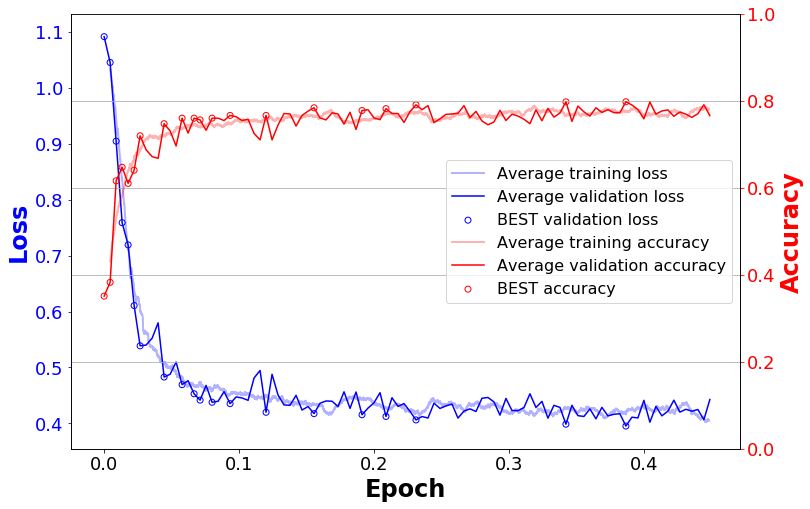

In [6]:
plot_utils.disp_learn_hist_smoothed(loc,window_train=200,window_val=1)

This actually looks pretty good - we get initially a very quick learning and then a plateau. Both training and validation loss is still decreasing slightly and tracking - which means we could probably kept on training

Let's run training on a small sample to illustrate overtraining

In [7]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [8]:
from utils.data_handling import WCH5Dataset

In [9]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [10]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=10000,val_split=0.1,test_split=0.1,transform=rotate_chan)

Reduced size: 10000


In [11]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 512
config.lr=0.01
config.device = 'gpu'
config.gpu_list = [0]
config.dump_path = '../model_state_dumps'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2

In [12]:
from utils.engine import Engine

In [13]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_172747/


In [14]:
engine.train(epochs=20,report_interval=10,valid_interval=10)

Epoch 0 Starting @ 2019-08-23 17:27:47
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.103 ... Validation Accuracy 0.307
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
best validation loss so far!: 1.1028003692626953
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.099 ... Accuracy 0.344
... Iteration 10 ... Epoch 0.04 ... Validation Loss 1.093 ... Validation Accuracy 0.342
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
best validation loss so far!: 1.092736840248108
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNNBEST.pth
... Iteration 11 ... Epoch 0.04 ... Loss 1.096 ... Accuracy 0.312
starting over on the validation set
... Iteration 20 ... Epoch 0.08 ... Validation Loss 1.084 ... Validation Accuracy 0.336
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
best validation loss so far!: 1.0835429430007935
Saved checkpoint 

... Iteration 280 ... Epoch 1.12 ... Validation Loss 0.831 ... Validation Accuracy 0.607
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 281 ... Epoch 1.12 ... Loss 0.855 ... Accuracy 0.594
... Iteration 290 ... Epoch 1.16 ... Validation Loss 1.049 ... Validation Accuracy 0.346
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 291 ... Epoch 1.16 ... Loss 1.040 ... Accuracy 0.344
starting over on the validation set
... Iteration 300 ... Epoch 1.20 ... Validation Loss 0.871 ... Validation Accuracy 0.646
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 301 ... Epoch 1.20 ... Loss 0.863 ... Accuracy 0.656
... Iteration 310 ... Epoch 1.24 ... Validation Loss 0.728 ... Validation Accuracy 0.619
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 311 ... Epoch 1.24 ... Loss 0.713 ... Accuracy 0.688
starting over on the validation set
... Iteration 32

Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 591 ... Epoch 2.36 ... Loss 0.441 ... Accuracy 0.688
starting over on the validation set
... Iteration 600 ... Epoch 2.40 ... Validation Loss 0.445 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
best validation loss so far!: 0.44522973895072937
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNNBEST.pth
... Iteration 601 ... Epoch 2.40 ... Loss 0.467 ... Accuracy 0.656
... Iteration 610 ... Epoch 2.44 ... Validation Loss 0.495 ... Validation Accuracy 0.701
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 611 ... Epoch 2.44 ... Loss 0.502 ... Accuracy 0.594
starting over on the validation set
... Iteration 620 ... Epoch 2.48 ... Validation Loss 0.456 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 621 ... Epoch 2.48 ... Loss 0.50

... Iteration 911 ... Epoch 3.64 ... Loss 0.464 ... Accuracy 0.719
starting over on the validation set
... Iteration 920 ... Epoch 3.68 ... Validation Loss 0.476 ... Validation Accuracy 0.719
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 921 ... Epoch 3.68 ... Loss 0.460 ... Accuracy 0.750
... Iteration 930 ... Epoch 3.72 ... Validation Loss 0.417 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
best validation loss so far!: 0.41741234064102173
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNNBEST.pth
... Iteration 931 ... Epoch 3.72 ... Loss 0.544 ... Accuracy 0.688
starting over on the validation set
... Iteration 940 ... Epoch 3.76 ... Validation Loss 0.443 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 941 ... Epoch 3.76 ... Loss 0.403 ... Accuracy 0.750
... Iteration 950 ... Epoch 3.80 ... Validation Los

... Iteration 1240 ... Epoch 4.96 ... Validation Loss 0.439 ... Validation Accuracy 0.746
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1241 ... Epoch 4.96 ... Loss 0.373 ... Accuracy 0.750
Epoch 5 Starting @ 2019-08-23 17:28:26
... Iteration 1250 ... Epoch 5.00 ... Validation Loss 0.466 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1251 ... Epoch 5.00 ... Loss 0.465 ... Accuracy 0.781
starting over on the validation set
... Iteration 1260 ... Epoch 5.04 ... Validation Loss 0.484 ... Validation Accuracy 0.721
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1261 ... Epoch 5.04 ... Loss 0.455 ... Accuracy 0.812
... Iteration 1270 ... Epoch 5.08 ... Validation Loss 0.500 ... Validation Accuracy 0.701
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1271 ... Epoch 5.08 ... Loss 0.471 ... Accuracy 0.719
start

starting over on the validation set
... Iteration 1580 ... Epoch 6.32 ... Validation Loss 0.444 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1581 ... Epoch 6.32 ... Loss 0.315 ... Accuracy 0.906
... Iteration 1590 ... Epoch 6.36 ... Validation Loss 0.429 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1591 ... Epoch 6.36 ... Loss 0.372 ... Accuracy 0.812
starting over on the validation set
... Iteration 1600 ... Epoch 6.40 ... Validation Loss 0.443 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1601 ... Epoch 6.40 ... Loss 0.486 ... Accuracy 0.656
... Iteration 1610 ... Epoch 6.44 ... Validation Loss 0.445 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1611 ... Epoch 6.44 ... Loss 0.310 ... Accuracy 0.875
starting

... Iteration 1911 ... Epoch 7.64 ... Loss 0.408 ... Accuracy 0.781
starting over on the validation set
... Iteration 1920 ... Epoch 7.68 ... Validation Loss 0.541 ... Validation Accuracy 0.684
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1921 ... Epoch 7.68 ... Loss 0.545 ... Accuracy 0.625
... Iteration 1930 ... Epoch 7.72 ... Validation Loss 0.434 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1931 ... Epoch 7.72 ... Loss 0.433 ... Accuracy 0.781
starting over on the validation set
... Iteration 1940 ... Epoch 7.76 ... Validation Loss 0.489 ... Validation Accuracy 0.705
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 1941 ... Epoch 7.76 ... Loss 0.454 ... Accuracy 0.688
... Iteration 1950 ... Epoch 7.80 ... Validation Loss 0.446 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iter

... Iteration 2250 ... Epoch 9.00 ... Validation Loss 0.459 ... Validation Accuracy 0.730
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2251 ... Epoch 9.00 ... Loss 0.405 ... Accuracy 0.781
starting over on the validation set
... Iteration 2260 ... Epoch 9.04 ... Validation Loss 0.442 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2261 ... Epoch 9.04 ... Loss 0.578 ... Accuracy 0.719
... Iteration 2270 ... Epoch 9.08 ... Validation Loss 0.436 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2271 ... Epoch 9.08 ... Loss 0.438 ... Accuracy 0.750
starting over on the validation set
... Iteration 2280 ... Epoch 9.12 ... Validation Loss 0.437 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2281 ... Epoch 9.12 ... Loss 0.305 ... Accuracy 0.844
... Iter

starting over on the validation set
... Iteration 2580 ... Epoch 10.32 ... Validation Loss 0.516 ... Validation Accuracy 0.721
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2581 ... Epoch 10.32 ... Loss 0.504 ... Accuracy 0.656
... Iteration 2590 ... Epoch 10.36 ... Validation Loss 0.482 ... Validation Accuracy 0.730
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2591 ... Epoch 10.36 ... Loss 0.424 ... Accuracy 0.812
starting over on the validation set
... Iteration 2600 ... Epoch 10.40 ... Validation Loss 0.520 ... Validation Accuracy 0.703
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2601 ... Epoch 10.40 ... Loss 0.515 ... Accuracy 0.719
... Iteration 2610 ... Epoch 10.44 ... Validation Loss 0.476 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2611 ... Epoch 10.44 ... Loss 0.615 ... Accuracy 0.656


... Iteration 2910 ... Epoch 11.64 ... Validation Loss 0.475 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2911 ... Epoch 11.64 ... Loss 0.502 ... Accuracy 0.719
starting over on the validation set
... Iteration 2920 ... Epoch 11.68 ... Validation Loss 0.420 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2921 ... Epoch 11.68 ... Loss 0.439 ... Accuracy 0.781
... Iteration 2930 ... Epoch 11.72 ... Validation Loss 0.478 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2931 ... Epoch 11.72 ... Loss 0.392 ... Accuracy 0.750
starting over on the validation set
... Iteration 2940 ... Epoch 11.76 ... Validation Loss 0.439 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 2941 ... Epoch 11.76 ... Loss 0.387 ... Accuracy 0.750


starting over on the validation set
... Iteration 3240 ... Epoch 12.96 ... Validation Loss 0.451 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3241 ... Epoch 12.96 ... Loss 0.354 ... Accuracy 0.812
Epoch 13 Starting @ 2019-08-23 17:29:29
... Iteration 3250 ... Epoch 13.00 ... Validation Loss 0.481 ... Validation Accuracy 0.758
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3251 ... Epoch 13.00 ... Loss 0.286 ... Accuracy 0.875
starting over on the validation set
... Iteration 3260 ... Epoch 13.04 ... Validation Loss 0.468 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3261 ... Epoch 13.04 ... Loss 0.565 ... Accuracy 0.688
... Iteration 3270 ... Epoch 13.08 ... Validation Loss 0.503 ... Validation Accuracy 0.713
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3271 ... Epoch 

... Iteration 3551 ... Epoch 14.20 ... Loss 0.351 ... Accuracy 0.812
starting over on the validation set
... Iteration 3560 ... Epoch 14.24 ... Validation Loss 0.461 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3561 ... Epoch 14.24 ... Loss 0.253 ... Accuracy 0.938
... Iteration 3570 ... Epoch 14.28 ... Validation Loss 0.427 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3571 ... Epoch 14.28 ... Loss 0.305 ... Accuracy 0.812
starting over on the validation set
... Iteration 3580 ... Epoch 14.32 ... Validation Loss 0.402 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3581 ... Epoch 14.32 ... Loss 0.454 ... Accuracy 0.719
... Iteration 3590 ... Epoch 14.36 ... Validation Loss 0.486 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth


... Iteration 3880 ... Epoch 15.52 ... Validation Loss 0.421 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3881 ... Epoch 15.52 ... Loss 0.468 ... Accuracy 0.719
... Iteration 3890 ... Epoch 15.56 ... Validation Loss 0.462 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3891 ... Epoch 15.56 ... Loss 0.349 ... Accuracy 0.781
starting over on the validation set
... Iteration 3900 ... Epoch 15.60 ... Validation Loss 0.459 ... Validation Accuracy 0.736
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3901 ... Epoch 15.60 ... Loss 0.286 ... Accuracy 0.875
... Iteration 3910 ... Epoch 15.64 ... Validation Loss 0.493 ... Validation Accuracy 0.750
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 3911 ... Epoch 15.64 ... Loss 0.543 ... Accuracy 0.656
starting over on the validation set


starting over on the validation set
... Iteration 4220 ... Epoch 16.88 ... Validation Loss 0.457 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4221 ... Epoch 16.88 ... Loss 0.342 ... Accuracy 0.875
... Iteration 4230 ... Epoch 16.92 ... Validation Loss 0.412 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4231 ... Epoch 16.92 ... Loss 0.365 ... Accuracy 0.781
starting over on the validation set
... Iteration 4240 ... Epoch 16.96 ... Validation Loss 0.491 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4241 ... Epoch 16.96 ... Loss 0.230 ... Accuracy 0.969
Epoch 17 Starting @ 2019-08-23 17:30:01
... Iteration 4250 ... Epoch 17.00 ... Validation Loss 0.412 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4251 ... Epoch 

... Iteration 4551 ... Epoch 18.20 ... Loss 0.301 ... Accuracy 0.812
starting over on the validation set
... Iteration 4560 ... Epoch 18.24 ... Validation Loss 0.473 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4561 ... Epoch 18.24 ... Loss 0.294 ... Accuracy 0.875
... Iteration 4570 ... Epoch 18.28 ... Validation Loss 0.483 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4571 ... Epoch 18.28 ... Loss 0.283 ... Accuracy 0.906
starting over on the validation set
... Iteration 4580 ... Epoch 18.32 ... Validation Loss 0.471 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4581 ... Epoch 18.32 ... Loss 0.457 ... Accuracy 0.719
... Iteration 4590 ... Epoch 18.36 ... Validation Loss 0.457 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth


... Iteration 4891 ... Epoch 19.56 ... Loss 0.273 ... Accuracy 0.938
starting over on the validation set
... Iteration 4900 ... Epoch 19.60 ... Validation Loss 0.535 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4901 ... Epoch 19.60 ... Loss 0.426 ... Accuracy 0.812
... Iteration 4910 ... Epoch 19.64 ... Validation Loss 0.449 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4911 ... Epoch 19.64 ... Loss 0.434 ... Accuracy 0.812
starting over on the validation set
... Iteration 4920 ... Epoch 19.68 ... Validation Loss 0.475 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth
... Iteration 4921 ... Epoch 19.68 ... Loss 0.350 ... Accuracy 0.875
... Iteration 4930 ... Epoch 19.72 ... Validation Loss 0.543 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_172747/SimpleCNN.pth


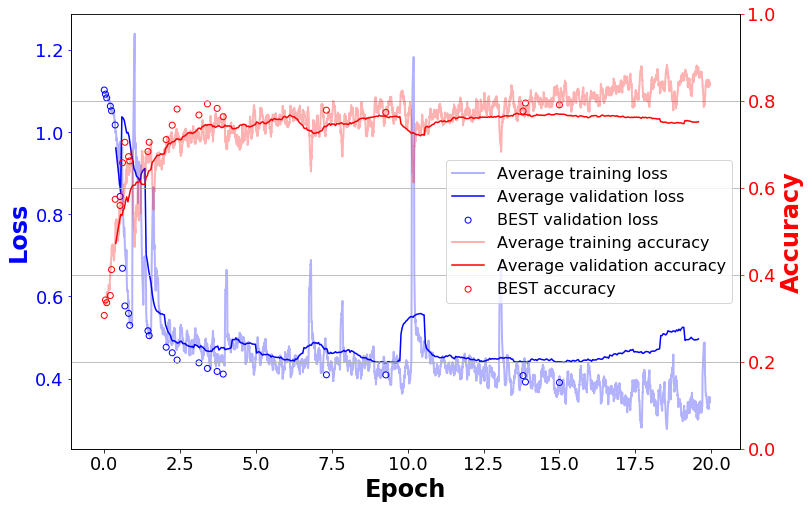

In [16]:
loc="../model_state_dumps/20190823_172747"
plot_utils.disp_learn_hist_smoothed(loc,window_train=20,window_val=20)

Now this clearly shows overtraining - validation loss starts to climb. Possibly other pathologies

## Evaluating model performance in classification task

Now let's go back to the full dataset and load the model trained last time on the full dataset

In [17]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [23]:
!ls ../model_state_dumps/20190823_171132

config_log.txt	log_train.csv  log_val.csv  SimpleCNNBEST.pth  SimpleCNN.pth


In [24]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_180353/


In [27]:
engine.restore_state("../model_state_dumps/20190823_171132/SimpleCNNBEST.pth")

In [29]:
engine.dirpath="../model_state_dumps/20190823_171132"

In [30]:
engine.validate()

### Examination of classifier output

Plot the classifier softmax output for various classes and outputs

In [ ]:
labels_val=np.load(engine.dirpath + "labels.npy")
predictions_val=np.load(engine.dirpath + "predictions.npy")
softmax_out_val=np.load(engine.dirpath + "softmax.npy")

In [ ]:
from matplotlib import pyplot as plt
def plot_resp(labels,softmax_out):
    fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
    ax1.tick_params(axis="both", labelsize=20)
    softmax_out_val_gamma_Pe=softmax_out_val[labels_val==0][:,1]
    softmax_out_val_e_Pe=softmax_out_val[labels_val==1][:,1]
    
    bins=np.linspace(0.0,1.0,51)
    values, bins, patches = ax1.hist(softmax_out_val_gamma_Pe, bins=bins, 
                                    label= 'gamma', color='blue', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax1.hist(softmax_out_val_e_Pe, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3)
    ax1.legend(prop={'size': 16})
    ax1.set_xlabel('$P(e)$',fontweight='bold',fontsize=24,color='black')
    
    fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
    ax2.tick_params(axis="both", labelsize=20)
    softmax_out_val_e_Pmu=softmax_out_val[labels_val==1][:,2]
    softmax_out_val_mu_Pmu=softmax_out_val[labels_val==2][:,2]
    
    values, bins, patches = ax2.hist(softmax_out_val_mu_Pmu, bins=bins, 
                                    label= 'muon', color='green', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax2.hist(softmax_out_val_e_Pmu, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3, log=True)
    ax2.legend(prop={'size': 16})
    ax2.set_xlabel('$P(\mu)$',fontweight='bold',fontsize=24,color='black')
    
    
    
    plt.show()

In [ ]:
plot_resp(labels_val,softmax_out_val)

### The confusion matrix

In [ ]:
plot_utils.plot_confusion_matrix(labels_val, predictions_val, ['$\gamma$','$e$','$\mu$'])

### Receiver Operating Characteristic
   - We will plot ROC treating electrons as 'signal' and photons as 'background', but we have also muons - which is also a signal, so we have more reasonable possibilities of plotting ROC curves - can you name advantages and disadvantages?

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
labels_val_e_gamma=labels_val[np.where( (labels_val==0) | (labels_val==1))]
softmax_out_val_e_gamma=softmax_out_val[np.where( (labels_val==0) | (labels_val==1))][:,1]
fpr,tpr,thr=roc_curve(labels_val_e_gamma,softmax_out_val_e_gamma)
roc_AUC=auc(fpr,tpr)
fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
ax1.tick_params(axis="both", labelsize=20)
ax1.plot(fpr,tpr,label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax1.set_xlabel('FPR',fontweight='bold',fontsize=24,color='black')
ax1.set_ylabel('TPR',fontweight='bold',fontsize=24,color='black')
ax1.legend(loc="lower right",prop={'size': 16})

rejection=1.0/(fpr+1e-10)

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
plt.yscale('log')
plt.ylim(1.0,1.0e3)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, rejection, label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('Rejection',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
#plt.yscale('log')
#plt.ylim(1.0,1)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, tpr/np.sqrt(fpr), label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('~significance gain',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

plt.show()
